
# Project: Investigate a Dataset of Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.

‘Neighborhood’ indicates the location of the hospital.

‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

I choose this dataset as it strongly relates to my career field.

*Though the analysis of this dataset I will try to answer the following questions:*

- Do patients tend to miss their appointment on a specific day of the week?
- Which age group has a higher frequency of not showing up to the appointment?

In [1]:
# First, I will load the libiraries I will be using though the data anallysis process

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

plt.style.use('bmh')


<a id='wrangling'></a>
## Data Wrangling

> Here I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.

## General Properties

In [2]:
# Loading the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# showing few lines of my data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Overview about my dataset

In [3]:
# Checking the shape of dataset (rows and columns)
print(f'My dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

My dataset contains 110527 rows and 14 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the data describion above I noticed that the mean age of patient is 37 years.

Age and Handicap columns have some unreasnable values like (-1 in age and 4 in handicap) I will need to check the kaggle page for this data to find some explanation from the data creator.

## Assess Data

### Check if my data contain duplicate rows

In [6]:
sum(df.duplicated())
#There is no duplicates in the data set

0

### Check number of NaN values in each column

In [7]:
df.isnull().sum()
# My data doesnt contain any NaN values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Checking the number of non-null unique values for features in dataset

In [8]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Check the data type in each column

In [9]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

## Being caution ;)
> create a copy of the original df so i can make modification with more confidence


In [10]:
df_2 = df.copy()

## Data Cleaning

In [11]:
df_2.shape

(110527, 14)

> My data started with 110527 rows and 14 columns
>
>Though the previous steps, I noticed that some columns (PatientId, AppointmentID) arent relevant in my exploratory analysis so, I will remove them.

### Drop extraneous columns

In [12]:
df_2.drop(['PatientId', 'AppointmentID'], axis=1 , inplace=True)

In [13]:
# recheck the no of columns now
df_2.shape

(110527, 12)

In [14]:
column_names = df_2.columns
column_names

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

### Rename Columns
> Some column names are misspelled or their names are not clear enough
>
> I will modify some of column names then convert all the columns names to smallcaps

In [15]:
df_2.rename(columns={'ScheduledDay': 'Schedule_date',
                     'AppointmentDay': 'Appointment_date',
                     'Scholarship':'financial_aid',
                    'Hipertension':'hypertension',
                    'Handcap':'handicap',
                    'No-show':'missed'} , inplace=True)



In [16]:
column_names = df_2.columns
column_names

Index(['Gender', 'Schedule_date', 'Appointment_date', 'Age', 'Neighbourhood',
       'financial_aid', 'hypertension', 'Diabetes', 'Alcoholism', 'handicap',
       'SMS_received', 'missed'],
      dtype='object')

In [17]:
#Applying a function to convert upper to lower case
df_2.rename(columns=lambda x: x.lower(),inplace=True)

In [18]:
column_names = df_2.columns
column_names

Index(['gender', 'schedule_date', 'appointment_date', 'age', 'neighbourhood',
       'financial_aid', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'missed'],
      dtype='object')

In [19]:
df_2.head()

,gender,schedule_date,appointment_date,age,neighbourhood,financial_aid,hypertension,diabetes,alcoholism,handicap,sms_received,missed
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Fixing Data Types

#### Change time stinges to timestamp to extract day of the week
> I will not also need the (ScheduledDay and AppointmentDay) in my analysis. But before I delete them I will extract the week day of the appointment to use it in analysis later.

>I Notice that two date columns (ScheduledDay and AppointmentDay) have a datatype of stinges while their appropriate datatype should have been timestamp as it allows me to manipulate this data easily.
>
> I will create a function (new_time) that will take the original columns as arg and convert its data to timestamp and extract the day of the week from it. Then, after I convert them I will add them as a column to my dataframe and delete the old ones.

In [20]:
# Take a closer look to the formate of the value
print(df_2.appointment_date[0])
print(len(df_2.appointment_date))

2016-04-29T00:00:00Z
110527


In [21]:
def day_of_week(x):
    """ takes the schedule date column and convert their values from stinge to timestamp using pandas then extracting the day of the week from it
        then returns a list of the week days"""
    days = []
    for i in range(len(x)):
        days.append(pd.to_datetime(x[i],format='%Y-%m-%dT%H:%M:%SZ').day_name())
    return days

In [22]:
days = day_of_week(df_2.appointment_date)
len(days)

110527

In [23]:
#then I will append the new days column
df_2['appointment_day'] = days

In [24]:
df_2.head()

,gender,schedule_date,appointment_date,age,neighbourhood,financial_aid,hypertension,diabetes,alcoholism,handicap,sms_received,missed,appointment_day
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [25]:
#Now, I will drop the old date columns
df_2.drop(['schedule_date','appointment_date'],axis=1, inplace=True)

In [26]:
df_2.head()

,gender,age,neighbourhood,financial_aid,hypertension,diabetes,alcoholism,handicap,sms_received,missed,appointment_day
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


#### Modify handicap column values

>I noticed that handcap column have 5 different values, So I will have a closer look to these values.
>
>Handicap column values are unclear, after reviewing the data creator comment on kaggle. the numbers are indicating the number of the desabilites the patient has. So as the numbers are meaningless for me, I will values for any number not = 0 to 1 to match the formate of the other columns of yes and no.

In [27]:
df_2.handicap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

In [28]:
handicapped = []
for i in df_2.handicap:
    if i != 0:
        handicapped.append(1)
    else:
        handicapped.append(i)

len(handicapped)
        

110527

In [29]:
# Will add the new data and delete the old column
df_2['handicapped'] = handicapped

df_2.drop('handicap',axis=1, inplace=True)

In [30]:
df_2.handicapped.value_counts()

0    108286
1      2241
Name: handicapped, dtype: int64

#### Modifying age column
>There is one negative value in the age column, and when I reviewed the data creator comments I found that he considered a fetus of a pregnant woman a patient with age -1 as he is not born yet
but this doesn't make any sense for my point of view, so I will drop this row

In [31]:
df_2.age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

In [32]:
# Getting the row that contains this age
df_2.query('age == -1')

,gender,age,neighbourhood,financial_aid,hypertension,diabetes,alcoholism,sms_received,missed,appointment_day,handicapped
99832,F,-1,ROMÃO,0,0,0,0,0,No,Monday,0


In [33]:
# dropping this row from my df
df_2.drop(df_2.query('age == -1').index, inplace=True)

In [34]:
# double checking that it was dropped
df_2.query('age == -1')

,gender,age,neighbourhood,financial_aid,hypertension,diabetes,alcoholism,sms_received,missed,appointment_day,handicapped


In [35]:
df_2.shape

(110526, 11)

In [36]:
df_2.nunique()

gender               2
age                103
neighbourhood       81
financial_aid        2
hypertension         2
diabetes             2
alcoholism           2
sms_received         2
missed               2
appointment_day      6
handicapped          2
dtype: int64

In [37]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   gender           110526 non-null  object
 1   age              110526 non-null  int64 
 2   neighbourhood    110526 non-null  object
 3   financial_aid    110526 non-null  int64 
 4   hypertension     110526 non-null  int64 
 5   diabetes         110526 non-null  int64 
 6   alcoholism       110526 non-null  int64 
 7   sms_received     110526 non-null  int64 
 8   missed           110526 non-null  object
 9   appointment_day  110526 non-null  object
 10  handicapped      110526 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 10.1+ MB


In [38]:
df_2.head()

,gender,age,neighbourhood,financial_aid,hypertension,diabetes,alcoholism,sms_received,missed,appointment_day,handicapped
0,F,62,JARDIM DA PENHA,0,1,0,0,0,No,Friday,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No,Friday,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,No,Friday,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No,Friday,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,No,Friday,0


All things looks good for me and ready to do exploratory data analysis

<a id='eda'></a>
## Exploratory Data Analysis

> Now that I've trimmed and cleaned the data, I will move on to exploration.

### General look over the data

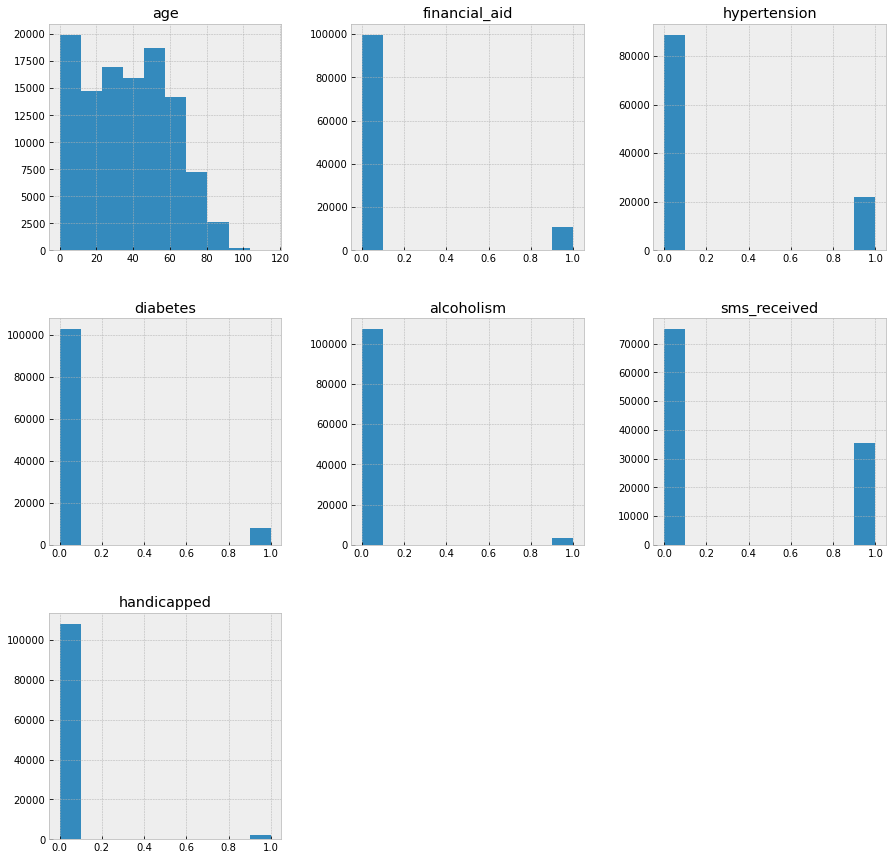

In [39]:
df_2.hist(figsize=(15,15));

The age distribution shows that most patients are <50 years.

Only less than 10% of patients have financial aid.

Most patients don't have chronic diseases, are not alcoholics or handicapped.

About 20% have HTN and 10% have DM

Handicapped patient is representing about 2% of the whole patients.

50% only of the patients received SMS.

#### Exploring number of patients who showed up and who didn't.

In [40]:
df_2.groupby('missed')['gender'].count()

missed
No     88207
Yes    22319
Name: gender, dtype: int64

The count of patients who attended their appointment is 88207, while only 22319 missed it.

#### The day of the week which have the high/low appoinment numbers

In [41]:
no_per_day= df_2.groupby(['appointment_day']).count()['gender']

In [42]:
no_per_day

appointment_day
Friday       19019
Monday       22714
Saturday        39
Thursday     17247
Tuesday      25640
Wednesday    25867
Name: gender, dtype: int64

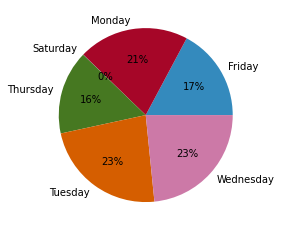

In [43]:
plt.pie(no_per_day, labels=no_per_day.index, autopct='%1.0f%%', pctdistance=0.65, labeldistance=1.1);

Wednesdays and Tuesdays are the most popular day of the week.

While, Saturdays appointments are not common.

### Research Question 1 (Do patients tend to miss their appointment on a specific day of the week?)

In [44]:
# I will get the total num of patients attending or missing their appointment in each day of the week
gp_days = df_2.groupby(['missed','appointment_day'])['age'].count()

In [45]:
gp_days

missed  appointment_day
No      Friday             14982
        Monday             18024
        Saturday              30
        Thursday           13909
        Tuesday            20488
        Wednesday          20774
Yes     Friday              4037
        Monday              4690
        Saturday               9
        Thursday            3338
        Tuesday             5152
        Wednesday           5093
Name: age, dtype: int64

In [46]:
# Getting the count of all patients 
totals = df_2.groupby('missed').count()['age']
totals

missed
No     88207
Yes    22319
Name: age, dtype: int64

In [47]:
# Getting the percentage of patients keeping their appointment of the total no of appointments in each day of the week

no_days_prcnt = gp_days['No'] / totals['No'] * 100

no_days_prcnt

appointment_day
Friday       16.985047
Monday       20.433752
Saturday      0.034011
Thursday     15.768590
Tuesday      23.227182
Wednesday    23.551419
Name: age, dtype: float64

In [48]:
# Getting the percentage of patients missing their appointment of the total no of appointments in each day of the week

yes_days_prcnt = gp_days['Yes'] / totals['Yes'] * 100

yes_days_prcnt

appointment_day
Friday       18.087728
Monday       21.013486
Saturday      0.040324
Thursday     14.955867
Tuesday      23.083471
Wednesday    22.819123
Name: age, dtype: float64

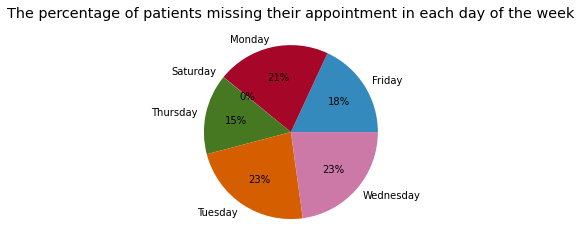

In [50]:
plt.pie(yes_days_prcnt, labels=yes_days_prcnt.index, autopct='%1.0f%%', pctdistance=0.65, labeldistance=1.1)
plt.title('The percentage of patients missing their appointment in each day of the week');

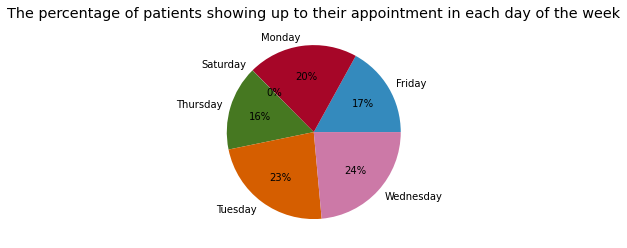

In [51]:

plt.pie(no_days_prcnt, labels=yes_days_prcnt.index, autopct='%1.0f%%', pctdistance=0.65, labeldistance=1.1)
plt.title('The percentage of patients showing up to their appointment in each day of the week');

Apparently, days of the week do not have a significant impact on the showing up or missing the appointment

### Research Question 2 (Which age group has a higher frequency of not showing up to the appointment?)

I will divide the data by age group to children ( Age <= 16), Young Adults ( Age 17 - 40 ), Old Adults ( 41 - 59) and Geriatrics (Age >= 60 )

In [52]:
# first, I will set bin edges that will be used to cut the data into groups
bin_edges = [df_2.age.min(),16,40,59,df_2.age.max()]
bin_edges

[0, 16, 40, 59, 115]

In [53]:
# Set the labels
bin_labels = ['16 and younger','17-40','41-59','60 and older']
bin_labels

['16 and younger', '17-40', '41-59', '60 and older']

In [54]:
df_2['age_group'] = pd.cut(df_2.age,bin_edges,labels = bin_labels)


In [55]:
df_2[['age_group','missed']].value_counts().sort_index(ascending=True)


age_group       missed
16 and younger  No        17369
                Yes        4962
17-40           No        26692
                Yes        8121
41-59           No        23315
                Yes        5355
60 and older    No        17931
                Yes        3242
dtype: int64

will get the count of patients attending or missing their appointment in each age group

In [56]:
counts = df_2.groupby(['missed','age_group']).count()['age']
#one column was picked 'age' as the result of all columns is the same
counts

missed  age_group     
No      16 and younger    17369
        17-40             26692
        41-59             23315
        60 and older      17931
Yes     16 and younger     4962
        17-40              8121
        41-59              5355
        60 and older       3242
Name: age, dtype: int64

In [57]:
# Getting the count of all patients 
totals = df_2.groupby('missed').count()['age']
totals

missed
No     88207
Yes    22319
Name: age, dtype: int64

In [58]:
# Getting attending percentage by dividing counts of patients attended their appointment in each gp by the total # of patients who attended from all groups * 100
attending_percentage = counts['No'] / totals['No'] * 100
attending_percentage

age_group
16 and younger    19.691181
17-40             30.260637
41-59             26.432143
60 and older      20.328319
Name: age, dtype: float64

In [59]:
# Getting missed percentage by dividing counts of patients missed their appointment in each gp by the total # of patients who missed from all groups times 100
missed_percentage = counts['Yes'] / totals['Yes'] * 100
missed_percentage

age_group
16 and younger    22.232179
17-40             36.386039
41-59             23.993010
60 and older      14.525740
Name: age, dtype: float64

### Plot proportions on a bar chart
I will set the x coordinate location for each group and and width of each bar.

In [60]:
ind = np.arange(len(attending_percentage))  # the x locations for the groups
width = 0.35       # the width of the bars

Plotting time :D

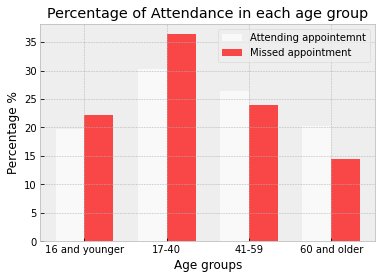

In [61]:
# plot bars
attend_bars = plt.bar(ind, attending_percentage, width, color='w', alpha=.7, label='Attending appointemnt')
missed_bars = plt.bar(ind + width, missed_percentage, width, color='r', alpha=.7, label='Missed appointment')

# setting title and labels
plt.ylabel('Percentage %')
plt.xlabel('Age groups')
plt.title('Percentage of Attendance in each age group')
locations = ind + width / 2  # xtick locations
labels = bin_labels  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();


It looks like as patients getting older they are more likely to keep their appointment more than missing it. While young adults
age between 14-40 years were more likely to miss their appoinments.

<a id='conclusions'></a>
## Conclusions

I concluded that age plays a role in predicting if the patient will show up or not. While, there was to correlation between the days of the week and attending the appointment.

### Limitation of the data

Handicap column values are unclear, after reviewing the data creator comment on kaggle. the numbers are indicating the number of the desabilites the patient has. but its not defining the kind of disabiliy. is it blindness or antyhing else ??

Appoiment column doesnt indluce the time of the appointment, which could have been useful in analysis.